# Exploratory Data Analysis

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('.\data\cleaned_data.csv')
df.head()

,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,HUDMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,Boston,50,7,15540,34.0,4.577,132474,84290,7308,93000,...,7,7,7,5,8,8,8,8,2,1
1,Boston,50,7,15540,29.0,3.421,100795,84290,7416,93000,...,7,7,7,2,7,7,7,7,2,1
2,Boston,50,15,99999,9532.0,6.152,49625,67566,5143,71900,...,7,7,7,2,7,7,7,7,2,1
3,Boston,50,17,30100,9594.0,3.935,62643,67105,8866,71900,...,7,7,7,2,7,7,7,7,2,1
4,Boston,23,31,38860,254.0,6.031,87679,76445,15240,90100,...,7,7,7,5,8,8,8,8,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89763 entries, 0 to 89762
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bank                             89763 non-null  object 
 1   FIPSStateNumericCode             89763 non-null  int64  
 2   FIPSCountyCode                   89763 non-null  int64  
 3   CoreBasedStatisticalAreaCode     89763 non-null  int64  
 4   CensusTractIdentifier            89763 non-null  float64
 5   CensusTractMinorityRatioPercent  89763 non-null  float64
 6   CensusTractMedFamIncomeAmount    89763 non-null  int64  
 7   LocalAreaMedianIncomeAmount      89763 non-null  int64  
 8   TotalMonthlyIncomeAmount         89763 non-null  int64  
 9   HUDMedianIncomeAmount            89763 non-null  int64  
 10  LoanAcquisitionActualUPBAmt      89763 non-null  int64  
 11  LTVRatioPercent                  89763 non-null  float64
 12  NoteDate          

In [4]:
#load state data so we can study the data based on the state names instead of state number

In [5]:
state = pd.read_csv(r'.\data\us-state-ansi-fips.csv')
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stname   51 non-null     object
 1    st      51 non-null     int64 
 2    stusps  51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [6]:
#Join these two dataframes to have the state names

In [7]:
state = state.rename(columns={' st' : 'FIPSStateNumericCode'})
state.head()

,stname,FIPSStateNumericCode,stusps
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA


In [8]:
df.FIPSStateNumericCode.sort_values().unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56,
       66], dtype=int64)

In [9]:
state.FIPSStateNumericCode.sort_values().unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56],
      dtype=int64)

In [10]:
guam = {'stname': 'Guam', 'FIPSStateNumericCode': 66, ' stusps': 'GU'}
state = state.append(guam, ignore_index = True)

In [17]:
df = pd.merge(df, state, how="left", on="FIPSStateNumericCode")

In [14]:
#banks by name and state

# Explore The Data

In [18]:
#banks by name and state

In [15]:
df.Bank.value_counts()

Chicago          22460
Topeka           16092
Des Moines       14467
Cincinnati       11250
Dallas            8069
Indianapolis      5677
Pittsburgh        4458
Boston            2824
San Francisco     2487
New York          1979
Name: Bank, dtype: int64

In [22]:
df.stname.value_counts().head(10)

Wisconsin     10747
Illinois       6841
Ohio           6748
Iowa           5781
Kansas         5004
California     4910
Indiana        4409
Texas          4409
Nebraska       4403
Missouri       3628
Name: stname, dtype: int64

In [23]:
#Income distribution

<AxesSubplot:>

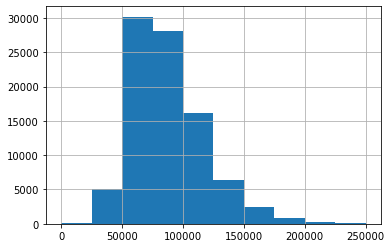

In [24]:
df.CensusTractMedFamIncomeAmount.hist()

<AxesSubplot:>

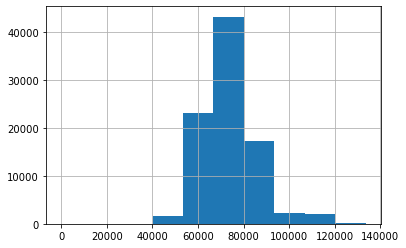

In [26]:
df.LocalAreaMedianIncomeAmount.hist()

<AxesSubplot:>

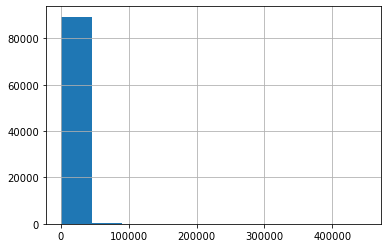

In [27]:
df.TotalMonthlyIncomeAmount.hist()

<AxesSubplot:>

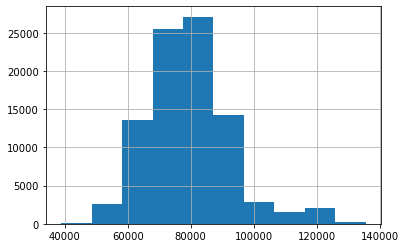

In [28]:
df.HUDMedianIncomeAmount.hist()